In [1]:
import tensorflow as tf
from tensorflow.keras.models impoer Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.datasets import mnist
import matplot.pyplot as plt
import numpy as np

SyntaxError: invalid syntax (900241617.py, line 2)

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [7]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


In [9]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [10]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(train_images,train_labels,epochs=5,verbose=1,batch_size=64,validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 17s 21ms/step - loss: 0.3805 - accuracy: 0.8816 - val_loss: 0.0764 - val_accuracy: 0.9769
Epoch 2/5
750/750 [==============================] - 14s 19ms/step - loss: 0.1524 - accuracy: 0.9547 - val_loss: 0.0540 - val_accuracy: 0.9843
Epoch 3/5
750/750 [==============================] - 14s 19ms/step - loss: 0.1155 - accuracy: 0.9656 - val_loss: 0.0486 - val_accuracy: 0.9864
Epoch 4/5
750/750 [==============================] - 14s 19ms/step - loss: 0.0962 - accuracy: 0.9707 - val_loss: 0.0433 - val_accuracy: 0.9877
Epoch 5/5
750/750 [==============================] - 14s 19ms/step - loss: 0.0814 - accuracy: 0.9754 - val_loss: 0.0438 - val_accuracy: 0.9882


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\n Test accuracy: {test_acc:.4f}")
print(f" Test loss: {test_loss:.4f}")

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

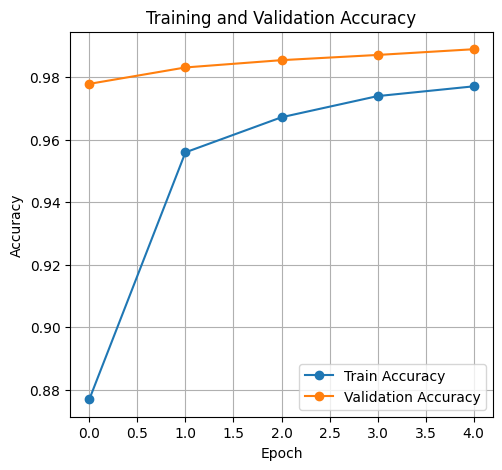

In [14]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

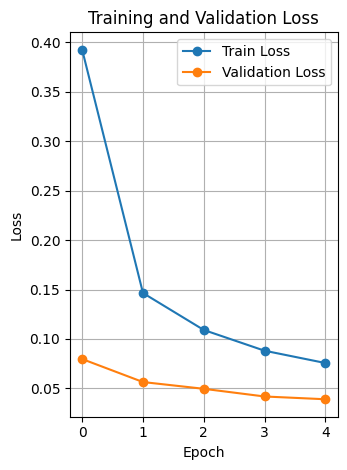

In [10]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

num_samples = 10
plt.figure(figsize=(15, 4))

313/313 [==============================] - 2s 5ms/step


<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

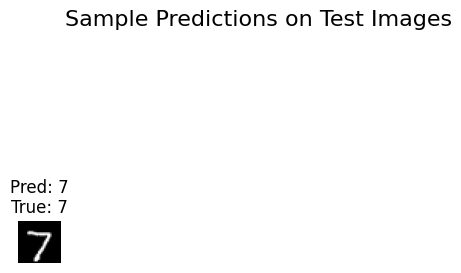

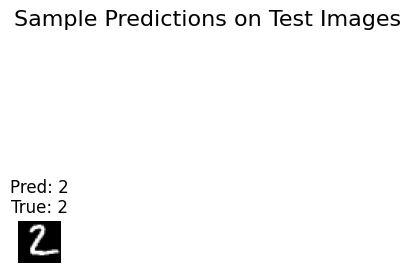

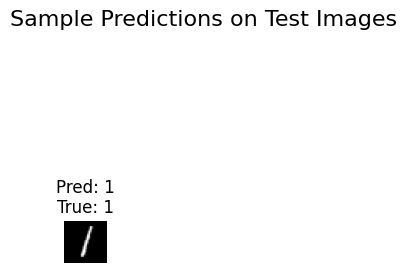

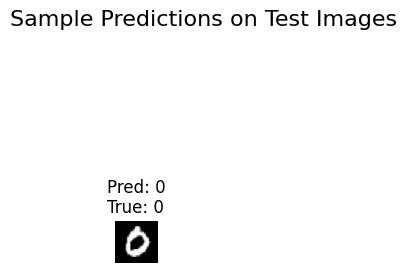

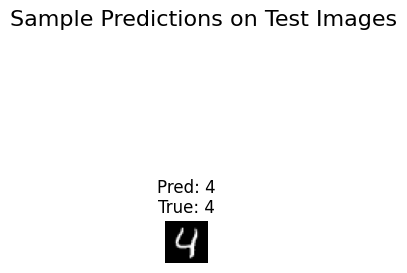

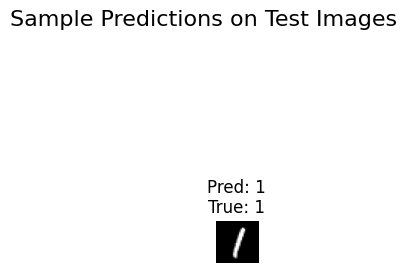

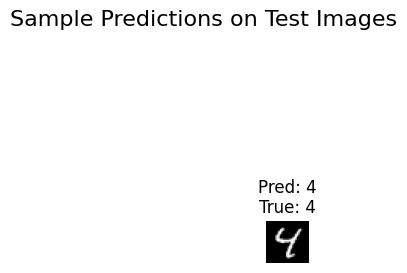

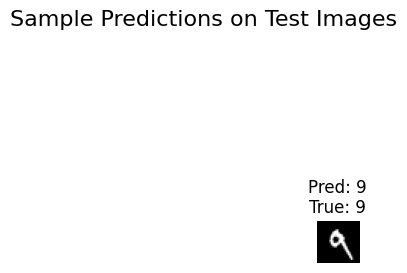

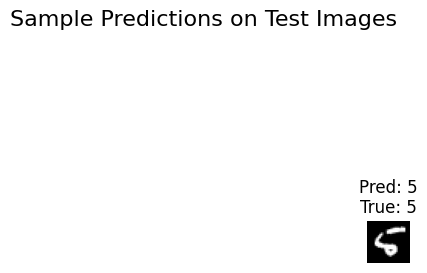

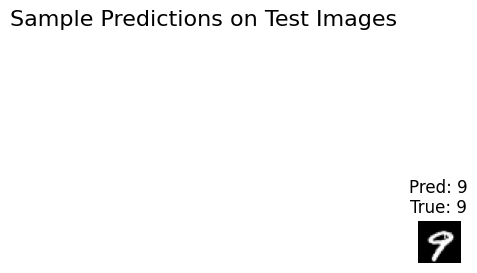

In [12]:
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {test_labels[i]}")
    plt.axis('off')
    plt.suptitle("Sample Predictions on Test Images", fontsize=16)
    plt.show()